<a href="https://colab.research.google.com/github/AvulaTrishal25/FMML_Project_-_Lab/blob/main/Lab1_module1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import plotly.graph_objects as pg
import plotly.express as px

In [4]:
def toss_coin(number_of_tosses=100):
    return pd.Series(np.random.choice(['Heads', 'Tails'], number_of_tosses))

def throw_dice(number_of_tosses=100):
    return pd.Series(np.random.randint(1, 6+1, number_of_tosses))

In [6]:
results = toss_coin()
print(results.value_counts())
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

Heads    51
Tails    49
Name: count, dtype: int64


In [7]:
results = pd.Series([np.sum(toss_coin(20) == 'Heads') for _ in range(1000)])
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

In [8]:
results = pd.Series([np.sum(toss_coin(500) == 'Heads') for _ in range(5000)])
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

In [9]:
results = {shots: throw_dice(shots) for shots in [10, 100, 1000, 10000, 1000000]}
fig = pg.Figure([pg.Bar(x=result.value_counts().keys(),
                        y=result.value_counts().values / shots,)
                    for shots, result in results.items()])
fig.add_shape(type='line', x0=0.5, y0=1/6, x1=6.5, y1=1/6, line=dict(color='Red',))
fig.show()

In [10]:
def number_of_numbered_cards_drawn_before_ace(trials=100, show_trials=10):
    values = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
    ranks = ['H', 'D', 'C', 'S']

    cards_thrown_counts = []
    for experiment in range(trials):
        deck_of_cards = [value + rank for value in values for rank in ranks]
        cards_thrown = 0
        cards_pile = []
        while len(deck_of_cards) > 0:
            picked_card = np.random.choice(deck_of_cards)
            cards_pile.append(picked_card)
            if picked_card[0] == 'A':
                break
            cards_thrown += 1
            deck_of_cards.remove(picked_card)
        if experiment < show_trials:
            print(cards_thrown, 'cards were thrown:', ' '.join(cards_pile))
        cards_thrown_counts.append(cards_thrown)

    return np.mean(cards_thrown_counts), cards_thrown_counts

expected_cards_thrown, cards_thrown_counts = number_of_numbered_cards_drawn_before_ace(10000)
print(f'\n{expected_cards_thrown} cards are tossed before we see the first ace!')

19 cards were thrown: 4C JD JH 8S 7D 6C 5D 8C 9H 7S 10S QD 9D KD 8H 6H 10C 7H 6S AD
22 cards were thrown: 5C 3D KD JS KC 6H 8H 8C KH 9S 2D 4D 5H 7H 2S 2C 4H 10S QS 6C 7C QH AS
8 cards were thrown: 6S 4H 8H 6C 9H 5C JD KS AC
11 cards were thrown: 6D KD 10H 9C 8C 2C JC 9H 3H 5D KS AS
6 cards were thrown: 6C 8D QD 3D 6D 3C AS
1 cards were thrown: JD AC
33 cards were thrown: 2S 3D QD 8D 6H 2D 7S 2C 9H QC 6D 5D KD 6C 7C KS QS 8C JS 5S 6S 9D 5H 7D 4S 3C 10H 10D 2H KC JH JC 4H AS
16 cards were thrown: 10H 6C JD 10S 7C 6H 10D 9H JC 6D 5S 8S 5C 8H 3C 9D AC
14 cards were thrown: 5S 6H 4D KS QS JH KD 2S 9C 6C 7H 10D 4C 3H AH
8 cards were thrown: 6S 5C 8S KH 2D 2H QH 7H AD

9.6726 cards are tossed before we see the first ace!


In [11]:
results = pd.Series(cards_thrown_counts)
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

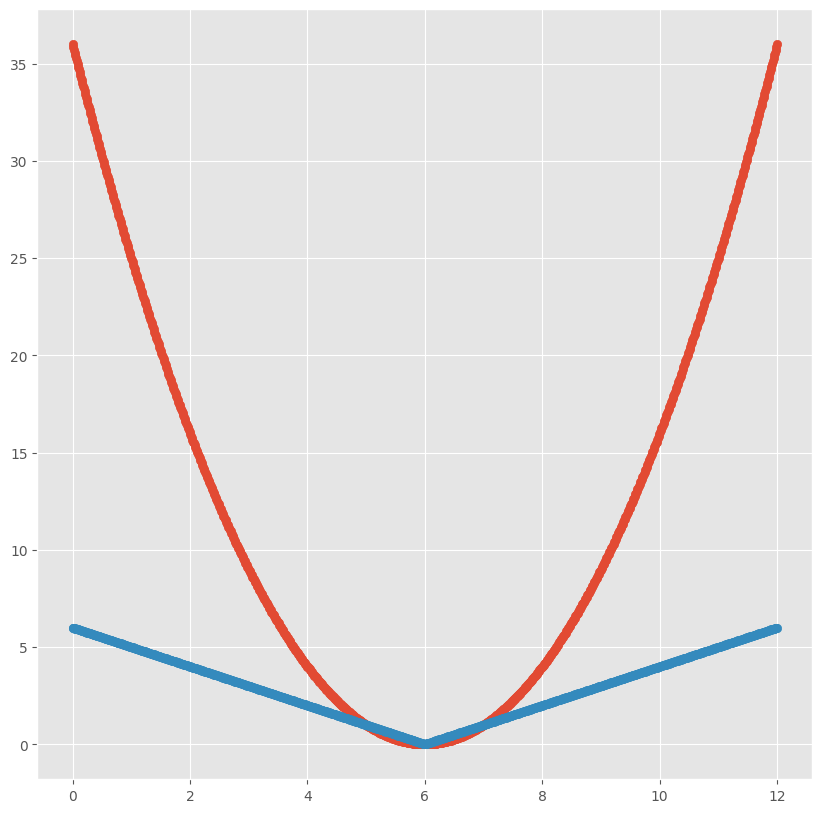

In [12]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))

measurements = np.linspace(0, 12, 1000)
plt.scatter(measurements, (measurements - 6) ** 2, label='Squared Error')
plt.scatter(measurements, abs(measurements - 6), label='Absolute Error')
plt.show()

In [14]:
grades = pd.read_csv("https://archive.org/download/ml-fundamentals-data/machine-learning-fundamentals-data/grades.csv")
print(grades.shape)
grades.agg(["mean", "var", "std"])

(26, 4)


TypeError: Could not convert string 'ArnoldBobCassandraDonovanEmilyFabianGromHilaryIvanJohnKevinLoiusMandyNatalieOliverPatrickQuitonRobertSofiaTerryUsmanVanessaWilsonXavierYukiZayn' to numeric

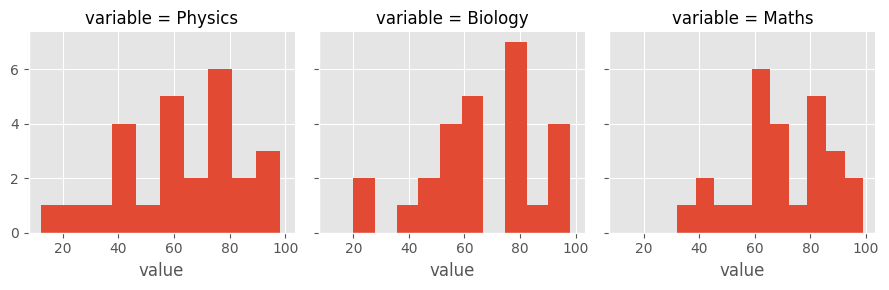

In [16]:
g = sns.FacetGrid(grades.melt("Name"), col="variable")
g.map(plt.hist, "value")

In [17]:
grades["Physics_std"] = (grades["Physics"] - grades["Physics"].mean()) / grades["Physics"].std()

In [18]:
grades.head()

,Name,Physics,Biology,Maths,Physics_std
0,Arnold,80,78,70,0.713673
1,Bob,60,98,45,-0.165735
2,Cassandra,34,56,65,-1.308965
3,Donovan,56,65,32,-0.341616
4,Emily,98,23,55,1.505141


In [19]:
grades["Maths_std"] = (grades["Maths"] - grades["Maths"].mean()) / grades["Maths"].std()
grades.head()

,Name,Physics,Biology,Maths,Physics_std,Maths_std
0,Arnold,80,78,70,0.713673,0.013309
1,Bob,60,98,45,-0.165735,-1.428471
2,Cassandra,34,56,65,-1.308965,-0.275047
3,Donovan,56,65,32,-0.341616,-2.178196
4,Emily,98,23,55,1.505141,-0.851759


In [20]:
from scipy.stats import binom

In [21]:
binom.pmf(k=5, n=5, p=0.25)

np.float64(0.0009765625)

In [22]:
1 - binom.pmf(k=4, n=5, p=0.75) - binom.pmf(k=5, n=5, p=0.75)

np.float64(0.3671875)

In [23]:
binom.cdf(3, n=5, p=0.75)

np.float64(0.3671875)

In [24]:
from scipy.stats import norm

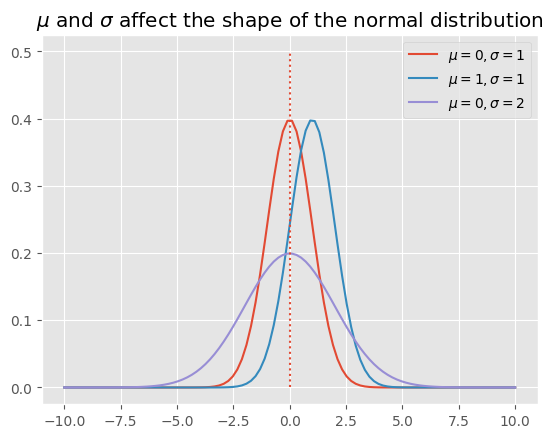

In [25]:
x = np.linspace(-10, 10, 100)
f1 = norm.pdf(x, loc=0, scale=1)
f2 = norm.pdf(x, loc=1, scale=1)
f3 = norm.pdf(x, loc=0, scale=2)

plt.plot(x, f1, label="$\mu=0, \sigma=1$")
plt.plot(x, f2, label="$\mu=1, \sigma=1$")
plt.plot(x, f3, label="$\mu=0, \sigma=2$")
plt.vlines(x=0, ymin=0, ymax=0.5, linestyles="dotted")

plt.legend()
plt.title("$\mu$ and $\sigma$ affect the shape of the normal distribution")
plt.show()

In [26]:
norm.cdf(0)

np.float64(0.5)

In [27]:
norm.ppf(0.5)

np.float64(0.0)

In [28]:
norm.ppf(0.84, loc=169.57, scale=7.57)

np.float64(177.09804617589782)

In [29]:
169.57 + 7.57

177.14

In [30]:
norm.ppf(0.975, loc=169.57, scale=7.57)

np.float64(184.4069273629682)

In [31]:
169.57 + 2 * 7.57

184.70999999999998

In [32]:
norm.ppf(0.0015, loc=169.57, scale=7.57)

np.float64(147.10422390516268)

In [33]:
169.57 - 3 * 7.57

146.85999999999999

In [34]:
from scipy.stats import poisson

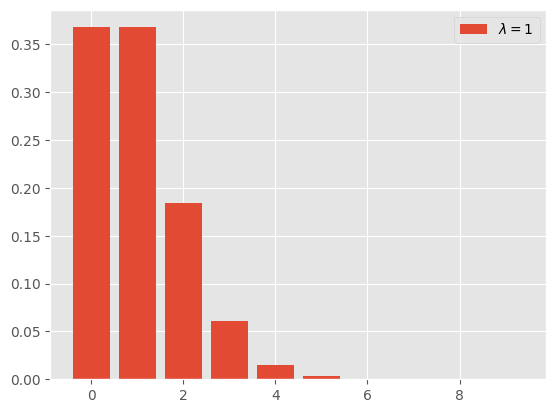

In [36]:
x = np.arange(10)
f1 = poisson.pmf(x, mu=1)
f2 = poisson.pmf(x, mu=2)
f3 = poisson.pmf(x, mu=3)

plt.bar(x, f1, label="$\lambda=1$")
plt.legend()


In [37]:
x @ f1

np.float64(0.999998874797402)

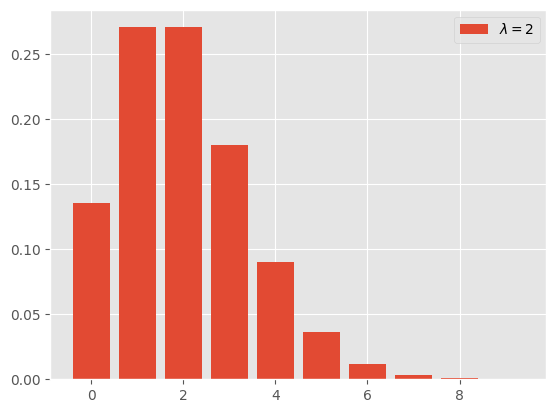

In [38]:

plt.bar(x, f2, label="$\lambda=2$")
plt.legend()

In [39]:
x @ f2

np.float64(1.999525105343477)

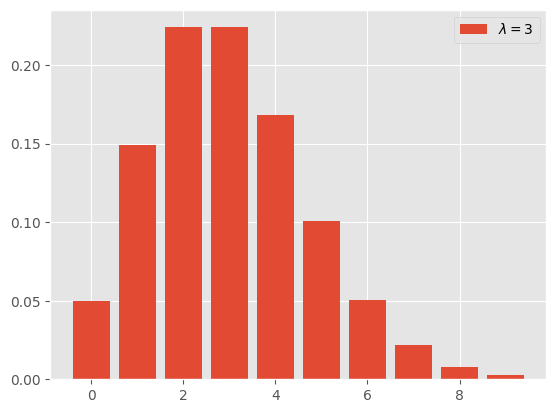

In [40]:
plt.bar(x, f3, label="$\lambda=3$")
plt.legend()

In [41]:
x @ f3

np.float64(2.9885910238149727)

In [42]:
poisson.pmf(3, 5)

np.float64(0.1403738958142805)

In [43]:
from scipy.stats import poisson

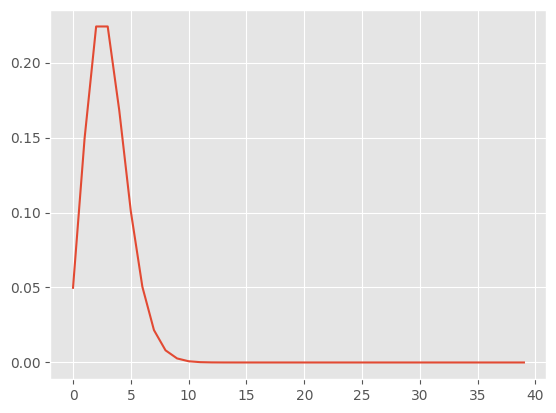

In [44]:
bins = np.arange(0, 40)
p_pois = poisson.pmf(bins, mu=3)
plt.plot(bins, p_pois)

(array([ 2., 21., 43., 62., 68., 86., 69., 26., 14.,  9.]),
 array([2.   , 2.205, 2.41 , 2.615, 2.82 , 3.025, 3.23 , 3.435, 3.64 ,
        3.845, 4.05 ]),
 <BarContainer object of 10 artists>)

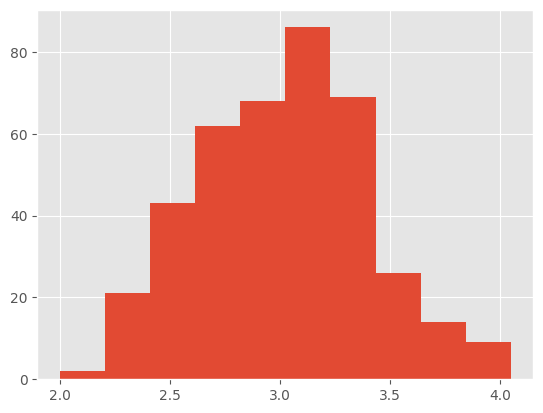

In [45]:
def sample_pois(_):
    samples = poisson.rvs(mu=3, size=20)
    return np.mean(samples)

means = list(map(sample_pois, np.arange(400)))
plt.hist(means)

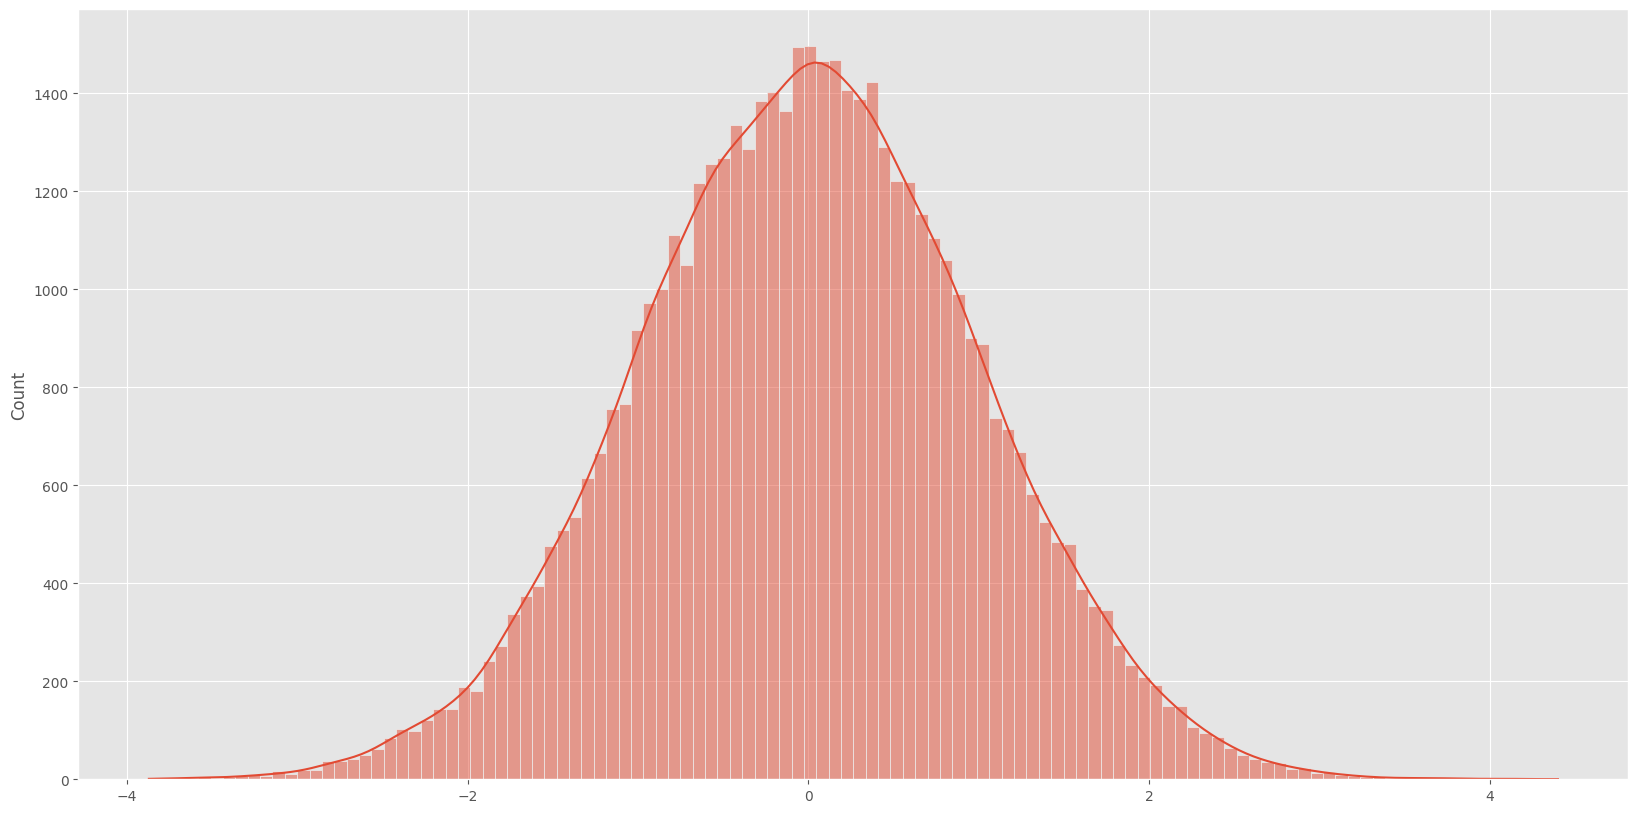

In [47]:
import seaborn as sns
plt.figure(figsize=(20, 10))
x = np.random.normal(size=(50000))
sns.histplot(x, kde=True)
plt.show()

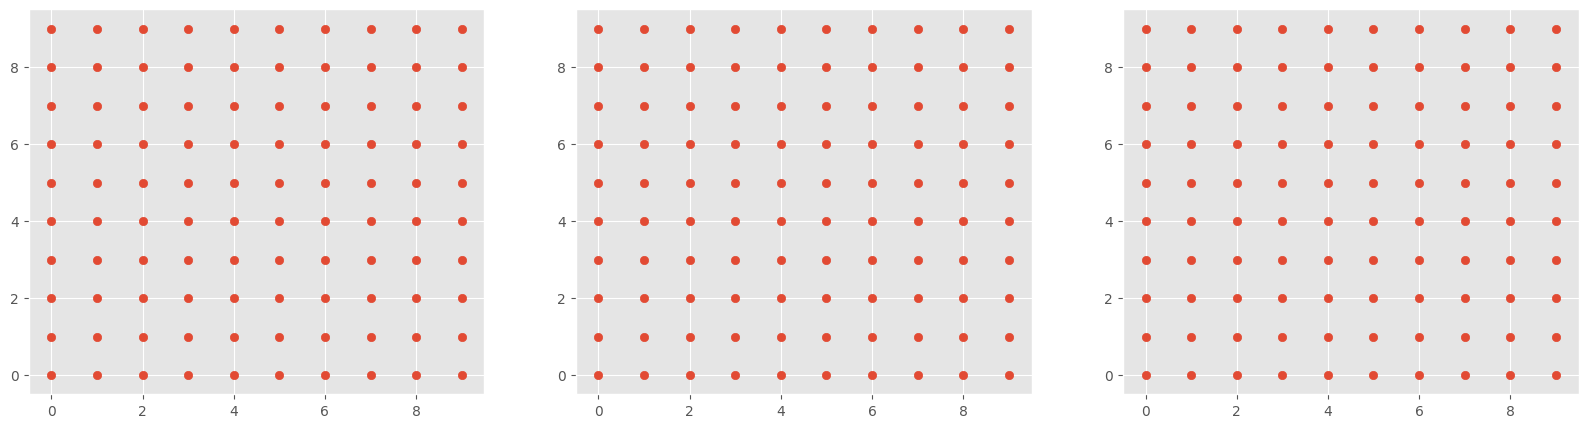

In [48]:
fix, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax in axs:
    x, y = np.meshgrid(np.arange(10), np.arange(10))
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()

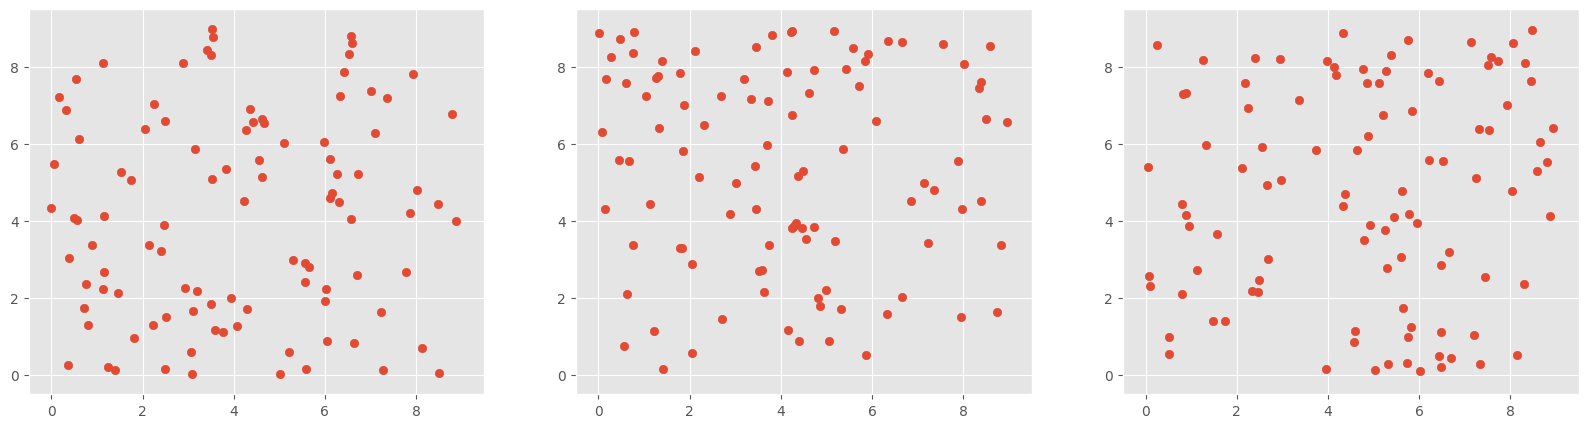

In [49]:
fix, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax in axs:
    x, y = np.random.random(100) * 9, np.random.random(100) * 9
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()

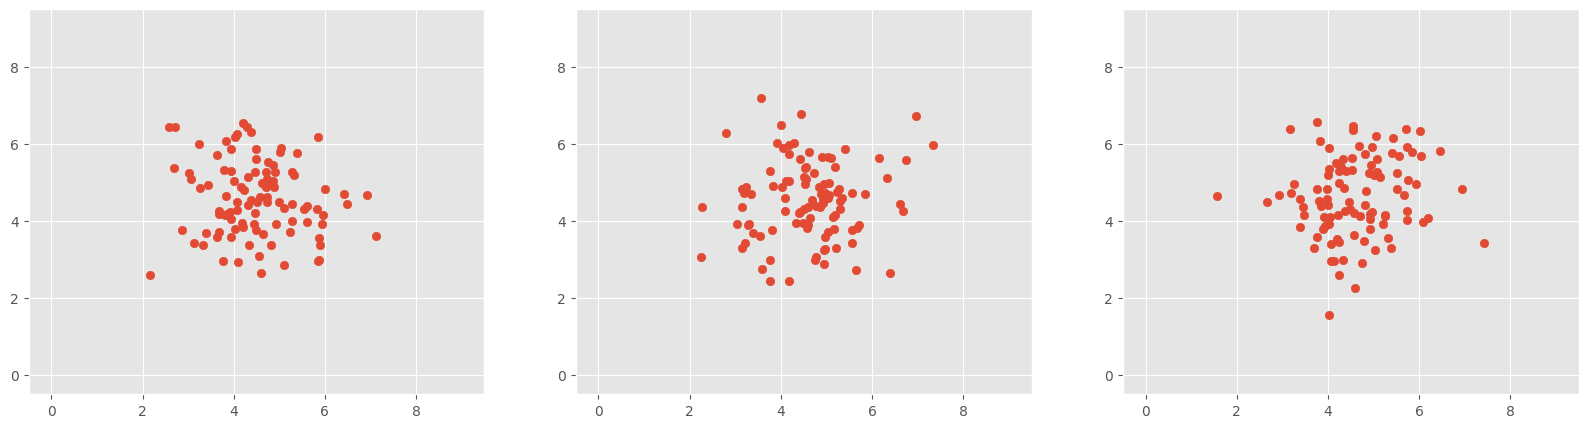

In [50]:
fix, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax in axs:
    x, y = np.random.normal(loc=4.5, scale=1.0, size=100), np.random.normal(loc=4.5, scale=1.0, size=100)
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()